<a href="https://colab.research.google.com/github/vmjs1234/DECISION_TREE_AND_ENSEMBLE/blob/main/6)_gb_regression_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.3 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
import catboost as cb


In [4]:
# Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target, name='Price')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Evaluate the model
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    print(f"RMSE: {rmse:.2f}")
    return y_pred


In [6]:
print("XGBoost Regressor:")
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
train_and_evaluate(xgb_model, X_train, X_test, y_train, y_test)


XGBoost Regressor:
RMSE: 0.48


array([0.561038  , 0.91529393, 4.965756  , ..., 4.7517886 , 0.79673225,
       1.792525  ], dtype=float32)

<Figure size 1000x800 with 0 Axes>

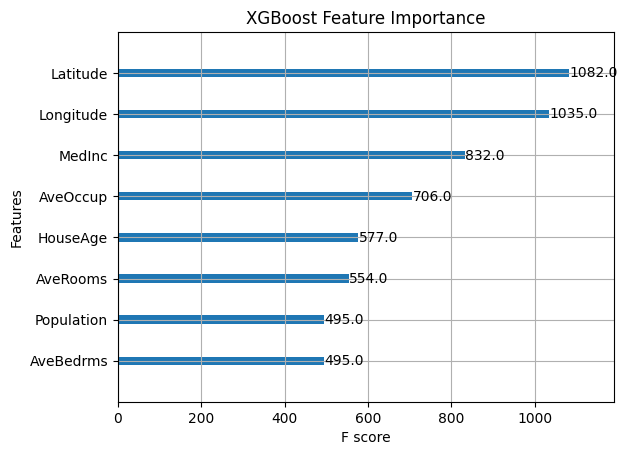

In [8]:
import matplotlib.pyplot as plt
from xgboost import plot_importance # Import the plot_importance function

plt.figure(figsize=(10, 8))
plot_importance(xgb_model, importance_type='weight')
plt.title('XGBoost Feature Importance')
plt.show()

In [9]:
print("LightGBM Regressor:")
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
train_and_evaluate(lgb_model, X_train, X_test, y_train, y_test)


LightGBM Regressor:
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002732 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947
RMSE: 0.47


array([0.50259626, 0.89754873, 5.01461986, ..., 5.09627248, 0.80997657,
       1.82713537])

<Figure size 1000x800 with 0 Axes>

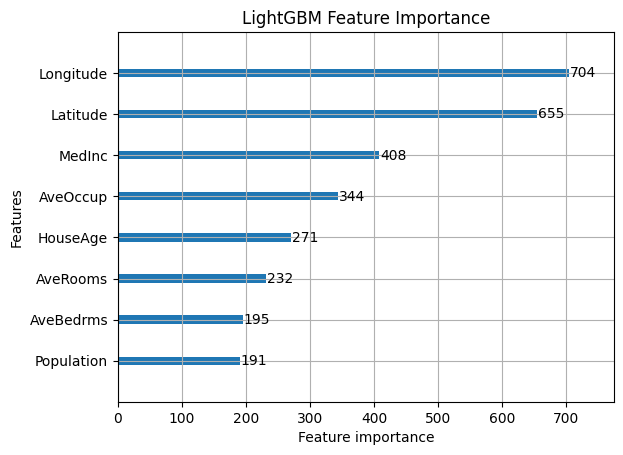

In [10]:
import lightgbm as lgb
import matplotlib.pyplot as plt


# Plot feature importances
plt.figure(figsize=(10, 8))
lgb.plot_importance(lgb_model, max_num_features=10, importance_type='split')
plt.title('LightGBM Feature Importance')
plt.show()


In [11]:
print("CatBoost Regressor:")
cb_model = cb.CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, random_state=42, verbose=0)
train_and_evaluate(cb_model, X_train, X_test, y_train, y_test)


CatBoost Regressor:
RMSE: 0.52


array([0.5517571 , 1.00566036, 4.31782046, ..., 4.85501759, 0.91798299,
       1.82014893])

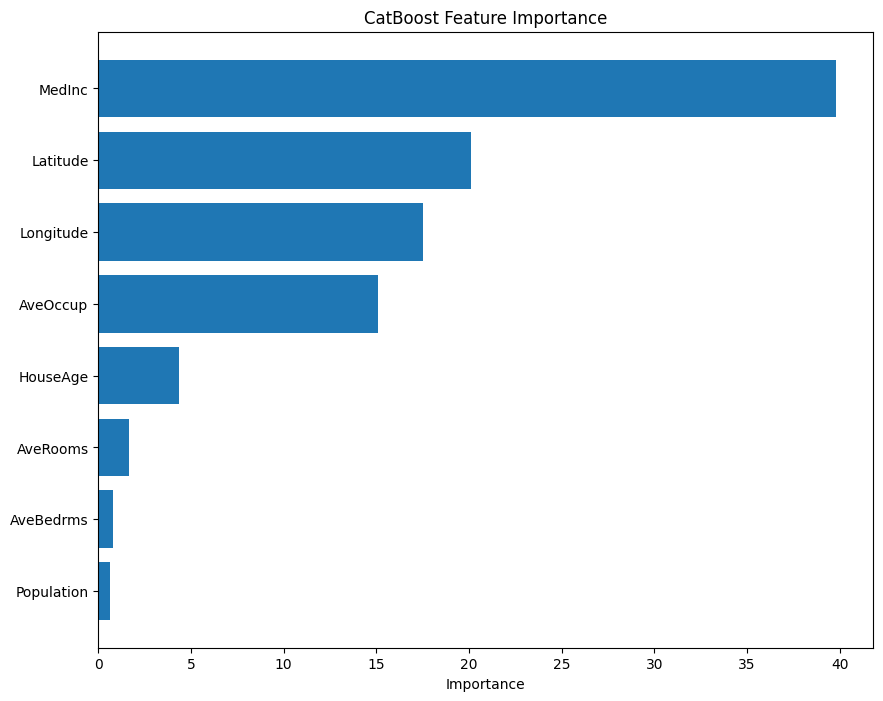

In [13]:
import catboost as cb
import pandas as pd
import matplotlib.pyplot as plt


# Get feature importances
feature_importances = cb_model.get_feature_importance()
feature_names = cb_model.feature_names_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()
plt.show()
